<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Project Case : Boston Housing Data

#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Familiarize with the Dataset

In [5]:
# Display basic information about the dataset
print("Dataset Shape:", boston_df.shape)
print("\nFirst 5 rows of the dataset:")
print(boston_df.head())
print("\nDataset Information:")
print(boston_df.info())
print("\nDescriptive Statistics:")
print(boston_df.describe())
print("\nCheck for missing values:")
print(boston_df.isnull().sum())

Dataset Shape: (506, 14)

First 5 rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-nul

In [6]:
# Display the column names and their meanings
print("\nVariable Descriptions:")
descriptions = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per $10,000',
    'PTRATIO': 'pupil-teacher ratio by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s'
}

for col, desc in descriptions.items():
    print(f"{col}: {desc}")


Variable Descriptions:
CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to five Boston employment centres
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000's


#### The dataset contains housing-related variables for Boston neighborhoods. Key variables include:

CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise).

NOX: Nitric oxide concentration (parts per 10 million).

AGE: Proportion of owner-occupied units built before 1940.

DIS: Weighted distance to employment centers.

MEDV: Median value of owner-occupied homes ($1000's).

## Task 2: Generate Descriptive Statistics and Visualizations

### 1. Boxplot for Median Value of Owner-Occupied Homes (MEDV)

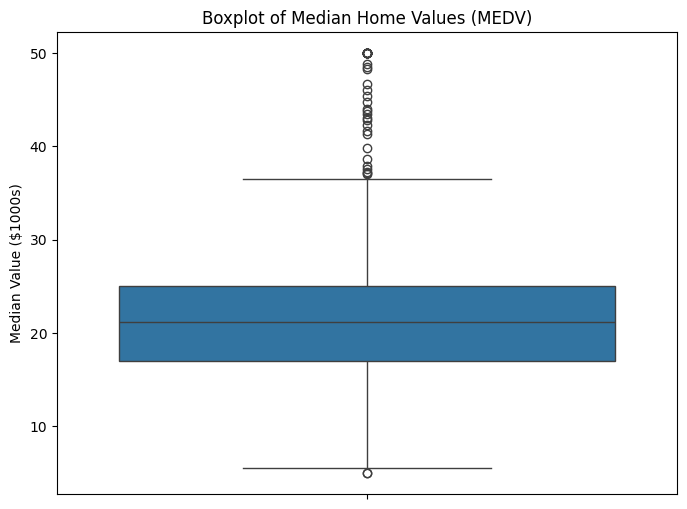

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Home Values (MEDV)")
plt.ylabel("Median Value ($1000s)")
plt.show()

#### Explanation:
The boxplot shows the distribution of median home values. The central line represents the median, while the box    spans the IQR (25th to 75th percentile). Outliers are visible beyond the whiskers, indicating neighborhoods with exceptionally high or low home values.

### 2. Bar Plot for Charles River Variable (CHAS)

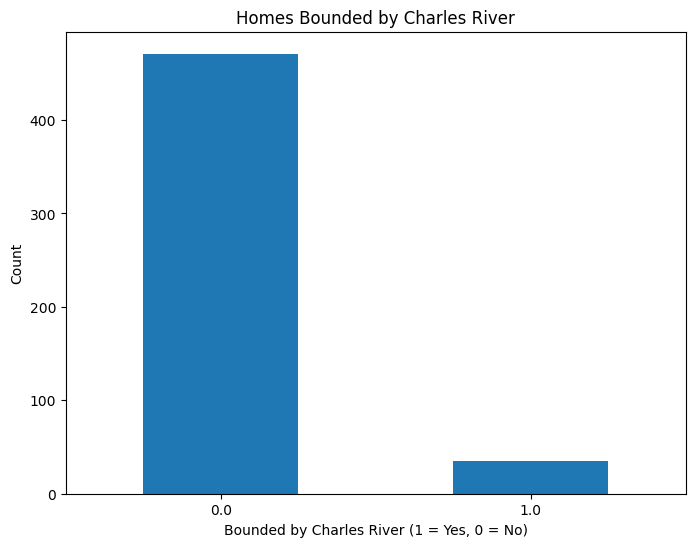

In [8]:
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title("Homes Bounded by Charles River")
plt.xlabel("Bounded by Charles River (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#### Explanation:
This bar plot compares the number of tracts bounded by the Charles River (1) versus not (0). It shows a significant imbalance, with far fewer tracts adjacent to the river.

### 3. Boxplot for MEDV vs AGE (Discretized into Three Groups)

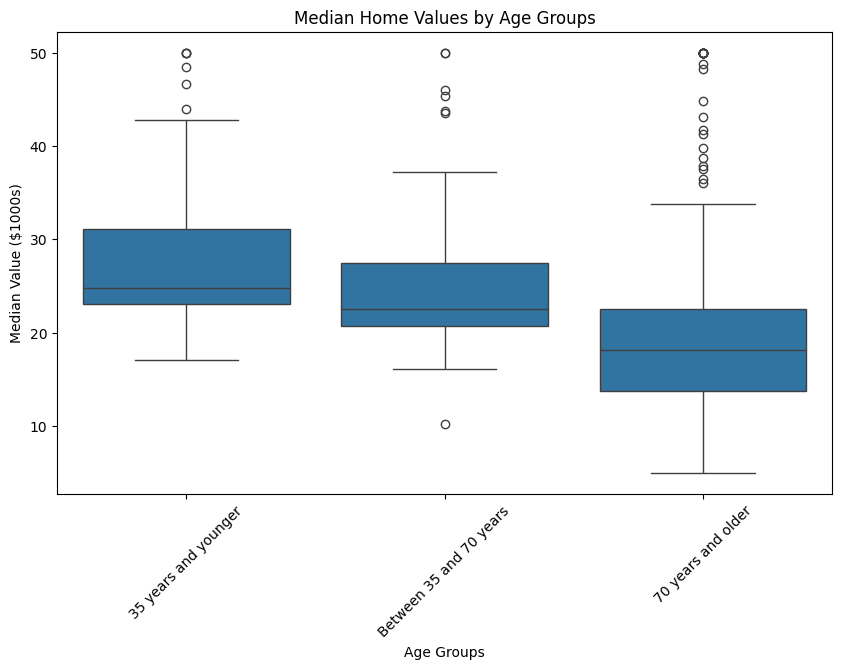

In [9]:
# Discretize the AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title("Median Home Values by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Median Value ($1000s)")
plt.xticks(rotation=45)
plt.show()

#### Explanation:
The boxplot compares MEDV across age groups. Older homes (70+ years) tend to have lower median values, while newer homes (≤35 years) show higher values and greater variability.

### 4. Scatter Plot: Nitric Oxide Concentrations vs Non-Retail Business Acres

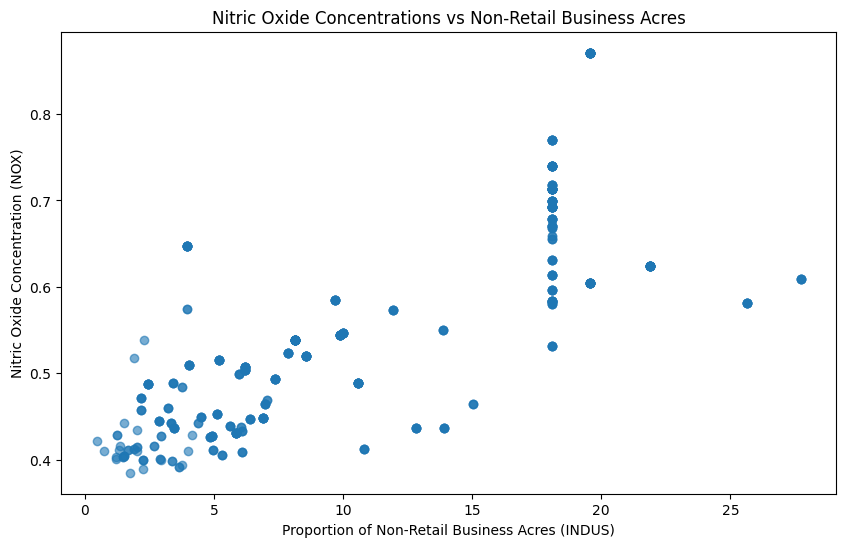

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6)
plt.title("Nitric Oxide Concentrations vs Non-Retail Business Acres")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

#### Explanation:
The scatter plot reveals a positive correlation between nitric oxide concentration and non-retail business acres. As INDUS increases, NOX concentrations also tend to rise, indicating potential pollution from industrial activity.

### 5. Histogram for Pupil-Teacher Ratio (PTRATIO)

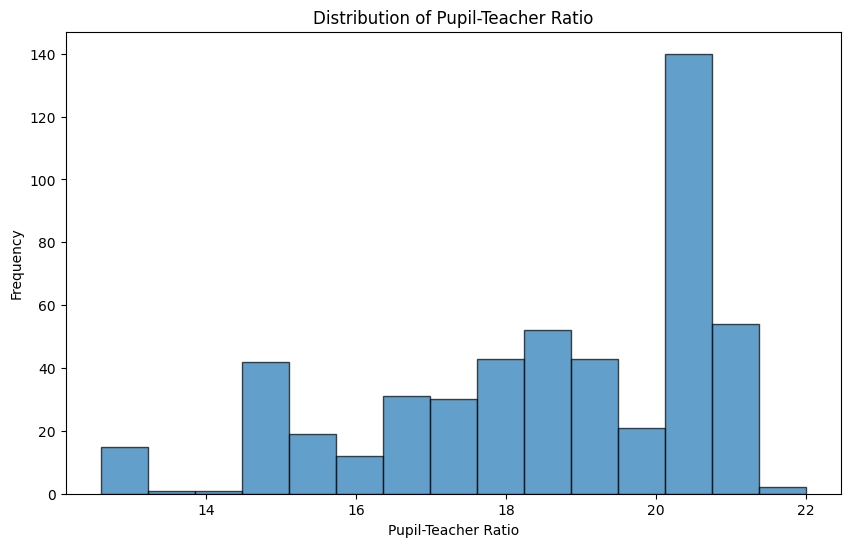

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Distribution of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

#### Explanation:
The histogram shows the distribution of pupil-teacher ratios. Most values cluster around 18–21, indicating typical class sizes in Boston schools. Few neighborhoods have very low or high ratios.

## Task 3: Statistical Tests

### 1. T-Test: MEDV vs CHAS (Charles River)

#### Hypothesis:
H₀: No difference in MEDV between tracts bounded by the Charles River and those not bounded.

H₁: Significant difference exists.

In [12]:
# Separate the groups
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = scipy.stats.ttest_ind(river, no_river)

print(f"T-test for MEDV between homes bounded by Charles River and not:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference in median home values.")
else:
    print("Conclusion: There is no significant difference in median home values.")

T-test for MEDV between homes bounded by Charles River and not:
T-statistic: 3.996, P-value: 0.0001
Conclusion: There is a significant difference in median home values.


### 2. ANOVA: MEDV vs AGE Groups

#### Hypothesis:

H₀: No difference in MEDV across age groups.

H₁: At least one group differs.

In [13]:
# Perform ANOVA
age_groups = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] for group in boston_df['AGE_GROUP'].unique()]
f_stat, p_value = scipy.stats.f_oneway(*age_groups)

print(f"ANOVA for MEDV across age groups:")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference in median home values across age groups.")
else:
    print("Conclusion: There is no significant difference in median home values across age groups.")

ANOVA for MEDV across age groups:
F-statistic: 36.408, P-value: 0.0000
Conclusion: There is a significant difference in median home values across age groups.


### 3. Pearson Correlation: NOX vs INDUS

#### Hypothesis:

H₀: No correlation between NOX and INDUS.

H₁: Correlation exists.

In [14]:
# Calculate Pearson correlation
corr, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

print(f"Pearson correlation between NOX and INDUS:")
print(f"Correlation coefficient: {corr:.3f}, P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Conclusion: There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: There is no significant relationship between NOX and INDUS.")

Pearson correlation between NOX and INDUS:
Correlation coefficient: 0.764, P-value: 7.9134e-98
Conclusion: There is a significant relationship between NOX and INDUS.


### 4. Regression Analysis: DIS vs MEDV

#### Hypothesis:

H₀: DIS has no effect on MEDV.

H₁: DIS affects MEDV.

In [15]:
# Perform regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add constant for intercept

model = sm.OLS(y, X).fit()
print(model.summary())

# Extract the coefficient for DIS
dis_coef = model.params['DIS']
print(f"\nImpact of an additional weighted distance to employment centers: ${dis_coef:.3f} thousand")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        13:48:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

## Summary:

### 1. Charles River: 
Homes near the river have higher values.

### 2. Older Homes: 
Homes built before 1940 (especially >70 years) have lower values.

### 3. Pollution:
Industrial areas (INDUS) correlate with higher nitric oxide levels (NOX).

### 4. Employment Centers:
Greater distance to employment centers (DIS) increases home values, possibly due to suburban preferences.